In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel("News Title.xls")
dataset = dataset.drop(columns="No")
dataset.sample(10)

,News Title,Category
38899,US Airways makes lewd tweet to Portland traveler,Entertainment
38165,Confirmed: 2012 particle is Higgs boson,Technology
34978,Fifty Shades of Grey trailer smashes records -...,Entertainment
9446,Rogue spiders prompt Mazda recall,Technology
49821,iPhone 6 vs. Samsung Galaxy S5: Specs Comparison,Technology
65476,Here's how the NSA can collect data from milli...,Technology
54537,10 Things to Know: This Week's Takeaways,Technology
19399,Destination Maternity aims to snuggle down wit...,Business
38535,Apple recalling some iPhone 5's,Technology
19675,Crumbs Collapses: Cupcake Chain Shuts Down All...,Business


# News Title Classification
Make a classifier to classify news title. There are 4 categories namely Business, Entertainment, Medical, and Technology. You can use file “News Title.xls” as Data Training.

In [3]:
dataset["Category"].unique()

array(['Technology', 'Business', 'Entertainment', 'Medical'], dtype=object)

In [4]:
dataset['Category'].value_counts()

Entertainment    23961
Business         17707
Technology       16776
Medical           7091
Name: Category, dtype: int64

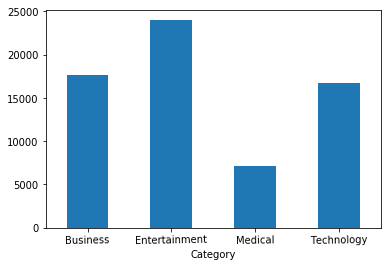

In [10]:
dataset.groupby('Category').Category.count().plot.bar(ylim=0,rot=True)
plt.show()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 2 columns):
News Title    65535 non-null object
Category      65535 non-null object
dtypes: object(2)
memory usage: 1.0+ MB


# PreProcessing

In [9]:
import os
import nltk
import nltk.corpus
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder

In [10]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2)) #join pat1 dan pat 2
www_pat = r'www.[^ ]+'
stopword_user = set(stopwords.words("english"))

In [11]:
def proses_teks(teks):
    soup = BeautifulSoup(teks,'lxml')
    souped = soup.get_text()
    try:
        teks = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        teks = souped
    teks_bersih= re.sub("[^a-zA-Z0-99]", " ",(re.sub(www_pat, '', re.sub(combined_pat, '', teks)).lower()))
    teks_bersih= ' '.join([word for word in teks_bersih.split() if word not in stopword_user])    
    return (" ".join([x for x in tok.tokenize(teks_bersih) if len(x) > 1])).strip()

In [12]:
x=[]
for teks in dataset["News Title"]:
    x.append(proses_teks(teks))

clean_text=pd.DataFrame({'clean_text':x})
data=pd.concat([dataset,clean_text],axis=1)

In [13]:
data.iloc[:,[0,2,1]].sample(10)

,News Title,clean_text,Category
41497,Google Inc (NASDAQ:GOOG) blamed for declines i...,google inc nasdaq goog blamed declines tesla m...,Business
753,"BBM updated with Stickers, photo-sharing in mu...",bbm updated stickers photo sharing multi perso...,Technology
63489,B&Q Owner Sees Bright Future,owner sees bright future,Business
13478,Retail marijuana sales in Washington face regu...,retail marijuana sales washington face regulat...,Business
14897,Miranda Lambert Glitters In A Nude Gown At ACM...,miranda lambert glitters nude gown acm awards,Entertainment
3248,Debate forum: 06/03,debate forum 06 03,Technology
707,Khloe Kardashian Does Something Crazy to Her A...,khloe kardashian something crazy appearance photo,Entertainment
60546,Surface Pro 2 Prices Being Trimmed Ahead Of Su...,surface pro prices trimmed ahead surface pro l...,Technology
4424,Apple buys music star Beats for US$3b,apple buys music star beats us 3b,Technology
63151,Jess reveals shockingly thin body,jess reveals shockingly thin body,Entertainment


In [14]:
data["code_new"] = data["Category"]
data.head()

,News Title,Category,clean_text,code_new
0,Google+ rolls out 'Stories' for tricked out ph...,Technology,google rolls stories tricked photo playback,Technology
1,Dov Charney's Redeeming Quality,Business,dov charney redeeming quality,Business
2,White God adds Un Certain Regard to the Palm Dog,Entertainment,white god adds un certain regard palm dog,Entertainment
3,"Google shows off Androids for wearables, cars,...",Technology,google shows androids wearables cars tvs,Technology
4,China May new bank loans at 870.8 bln yuan,Business,china may new bank loans 870 bln yuan,Business


In [15]:
labelencoder_0 = LabelEncoder() #independent variable encoder
data["code_new"] = labelencoder_0.fit_transform(data["code_new"])

In [16]:
list(labelencoder_0.classes_)

['Business', 'Entertainment', 'Medical', 'Technology']

In [17]:
data.iloc[:,[2,1,3]].sample(15)

,clean_text,Category,code_new
57874,russia boosts military global arms spending falls,Business,0
14148,whole foods sprouts struggle organic rivals grow,Business,0
25640,alcoa buy uk aerospace parts maker 85 billion,Business,0
56601,volkswagen denies planning bid us paccar,Business,0
20173,roster sony using sinister six,Entertainment,1
10637,polluted air linked seven million deaths 2012,Medical,2
37207,stanford scientists identify source cases inva...,Medical,2
56517,rumored asus smartwatch could android wear bar...,Technology,3
17957,asian shares yellen hike hint,Business,0
59522,shepherd leaving view,Entertainment,1


# Simple Visualiation

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [24]:
tech =' '.join([text for text in data['clean_text'][data['Category'] == 'Technology']])
bus =' '.join([text for text in data['clean_text'][data['Category'] == 'Business']])
ent =' '.join([text for text in data['clean_text'][data['Category'] == 'Entertainment']])
med =' '.join([text for text in data['clean_text'][data['Category'] == 'Medical']])

Text(0.5, 1.0, 'Technology News Trend')

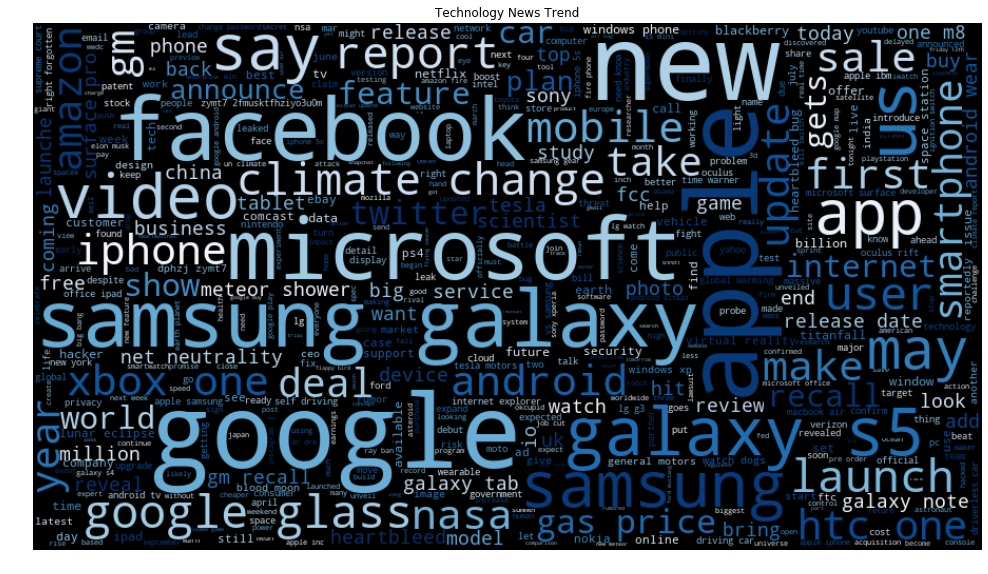

In [25]:
wc_tech = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(tech)

plt.figure(figsize=(17,14))
plt.imshow(wc_tech, interpolation='bilinear')
plt.axis("off")
plt.title("Technology News Trend")

Text(0.5, 1.0, 'Business News Trend')

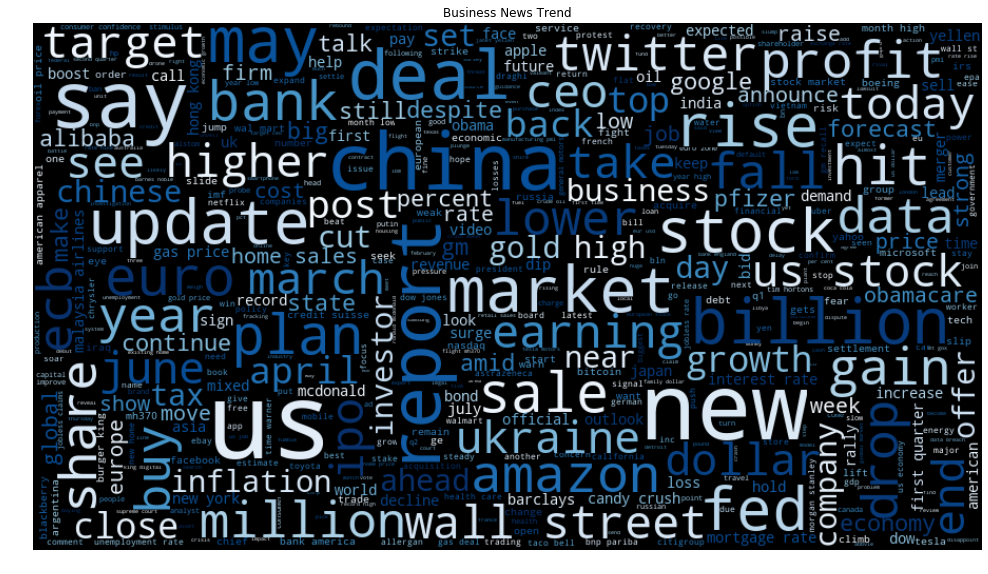

In [26]:
wc_bus = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(bus)

plt.figure(figsize=(17,14))
plt.imshow(wc_bus, interpolation='bilinear')
plt.axis("off")
plt.title("Business News Trend")

Text(0.5, 1.0, 'Entertainment News Trend')

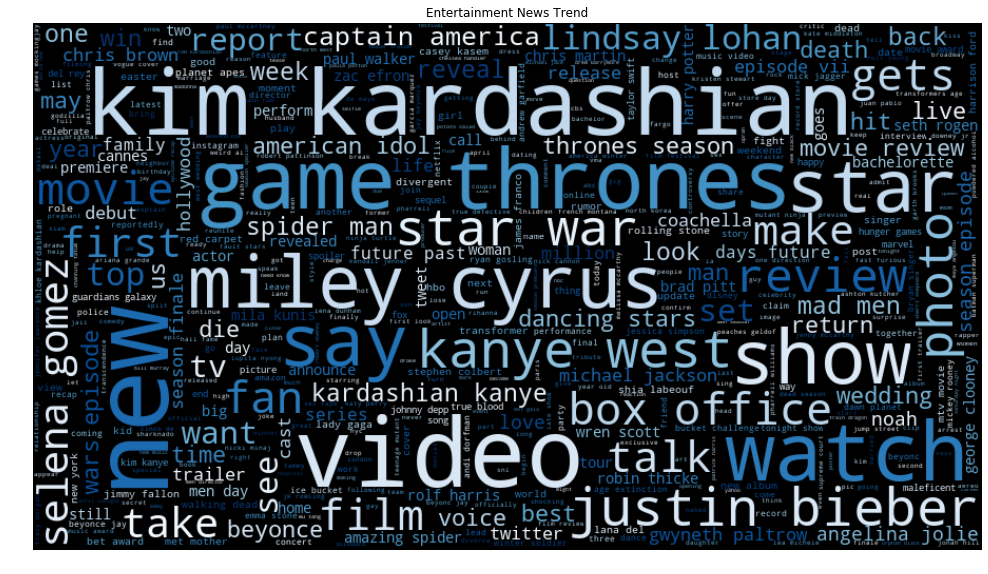

In [27]:
wc_ent = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(ent)

plt.figure(figsize=(17,14))
plt.imshow(wc_ent, interpolation='bilinear')
plt.axis("off")
plt.title("Entertainment News Trend")

Text(0.5, 1.0, 'Medical News Trend')

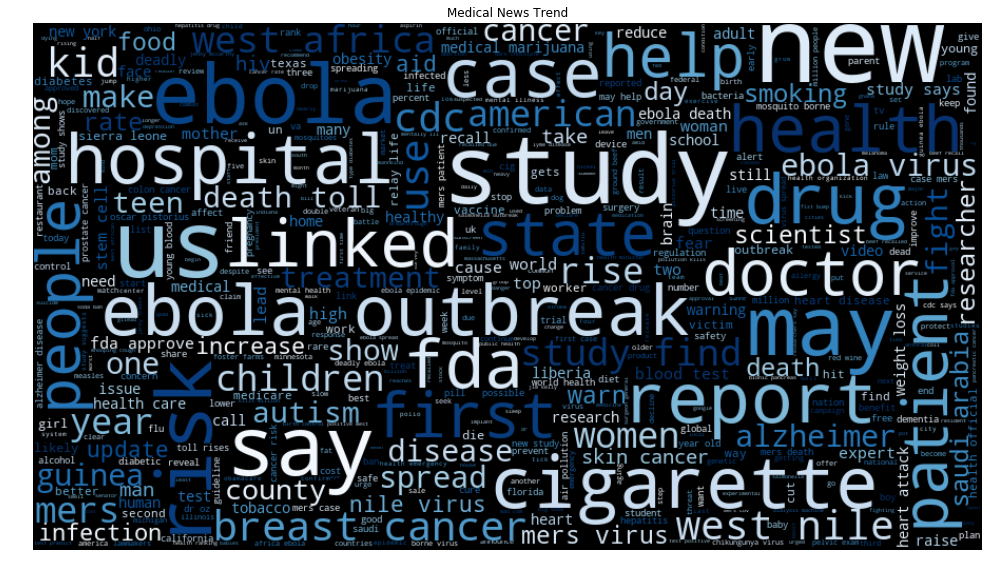

In [28]:
wc_med = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(med)

plt.figure(figsize=(17,14))
plt.imshow(wc_med, interpolation='bilinear')
plt.axis("off")
plt.title("Medical News Trend")

# Create Train Test 1000 data sample

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=data.clean_text.sample(1000)
y=data.code_new.sample(1000)

In [20]:
(trainX,testX,trainY,testY)=train_test_split(X,y,random_state=250,test_size=0.25)

In [21]:
print('Banyak data trainX :',len(trainX))
print('Banyak data trainY :',len(trainY))
print('Banyak data testX  :',len(testX))
print('Banyak data testY  :',len(testY))

Banyak data trainX : 750
Banyak data trainY : 750
Banyak data testX  : 250
Banyak data testY  : 250


In [25]:
testX.head()

45440    ohio links fracking earthquakes announces toug...
52313         ocean search mh370 stop certainty right spot
2216                     see evolution universe like never
725      aaliyah biopic lead star drops movie following...
24990    ocean acidification bad news vital alaskan fis...
Name: clean_text, dtype: object

In [24]:
testY.head()

34927    1
23519    3
6346     1
28604    3
14755    1
Name: code_new, dtype: int32

# Vectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer

In [34]:
cvec=CountVectorizer() #Convert a collection of text documents to a matrix of token counts
tvec=TfidfVectorizer() #frequency
hvec=HashingVectorizer() #bagofword

# Modelling

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [58]:
clf1 = RandomForestClassifier(n_estimators=150)
clf2 = DecisionTreeClassifier(max_depth=10)
clf3 = SVC(C=0.025,gamma="auto",verbose=True)
clf4 = KNeighborsClassifier(3)

<img src="model.png">

# Model Pipeline


In [38]:
from sklearn.pipeline import Pipeline

In [39]:
#Random Forest Classifier
model1= Pipeline([('vectorizer',cvec),('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec),('classifier',clf1)])
model3= Pipeline([('vectorizer',hvec),('classifier',clf1)])

#Decision Tree Classifier
model4= Pipeline([('vectorizer',cvec),('classifier',clf2)])
model5= Pipeline([('vectorizer',tvec),('classifier',clf2)])
model6= Pipeline([('vectorizer',hvec),('classifier',clf2)])

#SVC
model7= Pipeline([('vectorizer',cvec),('classifier',clf3)])
model8= Pipeline([('vectorizer',tvec),('classifier',clf3)])
model9= Pipeline([('vectorizer',hvec),('classifier',clf3)])

#KNN
model10= Pipeline([('vectorizer',cvec),('classifier',clf4)])
model11= Pipeline([('vectorizer',tvec),('classifier',clf4)])
model12= Pipeline([('vectorizer',hvec),('classifier',clf4)])

In [40]:
model1.fit(trainX,trainY)
hasil1=model1.predict(testX)

model2.fit(trainX,trainY)
hasil2=model2.predict(testX)

model3.fit(trainX,trainY)
hasil3=model3.predict(testX)

In [41]:
model4.fit(trainX,trainY)
hasil4=model4.predict(testX)

model5.fit(trainX,trainY)
hasil5=model5.predict(testX)

model6.fit(trainX,trainY)
hasil6=model6.predict(testX)

In [42]:
model7.fit(trainX,trainY)
hasil7=model7.predict(testX)

model8.fit(trainX,trainY)
hasil8=model8.predict(testX)

model9.fit(trainX,trainY)
hasil9=model9.predict(testX)

In [43]:
model10.fit(trainX,trainY)
hasil10=model10.predict(testX)

model11.fit(trainX,trainY)
hasil11=model11.predict(testX)

model12.fit(trainX,trainY)
hasil12=model12.predict(testX)

# Cek Akurasi

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
#matriks yang TP FP dll
confusion_matrix(testY,hasil1)

array([[ 5, 63,  2,  2],
       [ 3, 87,  2,  2],
       [ 0, 26,  0,  0],
       [ 2, 52,  0,  4]], dtype=int64)

In [46]:
RF_CVEC = accuracy_score(hasil1,testY)
RF_TVEC = accuracy_score(hasil2,testY)
RF_HVEC = accuracy_score(hasil3,testY)

DT_CVEC = accuracy_score(hasil4,testY)
DT_TVEC = accuracy_score(hasil5,testY)
DT_HVEC = accuracy_score(hasil6,testY)

SVC_CVEC = accuracy_score(hasil7,testY)
SVC_TVEC = accuracy_score(hasil8,testY)
SVC_HVEC = accuracy_score(hasil9,testY)

KNN_CVEC = accuracy_score(hasil10,testY)
KNN_TVEC = accuracy_score(hasil11,testY)
KNN_HVEC = accuracy_score(hasil12,testY)

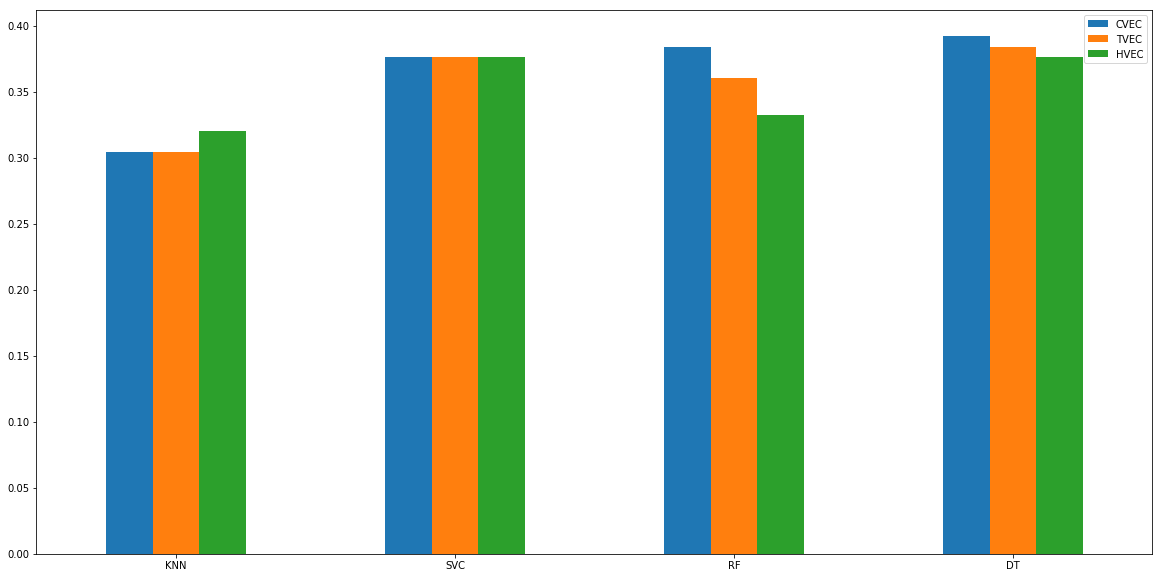

In [47]:
CVEC = [RF_CVEC,DT_CVEC,SVC_CVEC,KNN_CVEC]
TVEC = [RF_TVEC,DT_TVEC,SVC_TVEC,KNN_TVEC]
HVEC = [RF_HVEC,DT_HVEC,SVC_HVEC,KNN_HVEC]
index = ["RF","DT","SVC","KNN"]

df = pd.DataFrame({'CVEC': CVEC,'TVEC': TVEC,'HVEC': HVEC}, index=index)
df.sort_values(by=['CVEC']).plot(kind='bar',stacked=False,figsize=(20,10),rot=0)

# Create Train Test for all dataset

In [49]:
X2=data.clean_text
y2=data.code_new

In [64]:
print(X2.shape)
print(y2.shape)

(65535,)
(65535,)


In [50]:
(trainX2,testX2,trainY2,testY2)=train_test_split(X2,y2,random_state=250,test_size=0.2)

In [65]:
print('Banyak data trainX :',len(trainX2))
print('Banyak data trainY :',len(trainY2))
print('Banyak data testX  :',len(testX2))
print('Banyak data testY  :',len(testY2))

Banyak data trainX : 52428
Banyak data trainY : 52428
Banyak data testX  : 13107
Banyak data testY  : 13107


In [51]:
#Decision Tree Classifier
model4= Pipeline([('vectorizer',cvec),('classifier',clf2)])

#SVC
model7= Pipeline([('vectorizer',cvec),('classifier',clf3)])

#Random Forest Classifier
model1= Pipeline([('vectorizer',cvec),('classifier',clf1)])

In [53]:
#Random Forest Classifier
model1.fit(trainX2,trainY2)
hasil12=model1.predict(testX2)

In [54]:
#Decision Tree Classifier
model4.fit(trainX2,trainY2)
hasil42=model4.predict(testX2)

In [59]:
#SVC
model7.fit(trainX2,trainY2)
hasil72=model7.predict(testX2)

In [60]:
RF_CVEC = accuracy_score(hasil12,testY2)
DT_CVEC = accuracy_score(hasil42,testY2)
SVC_CVEC = accuracy_score(hasil72,testY2)

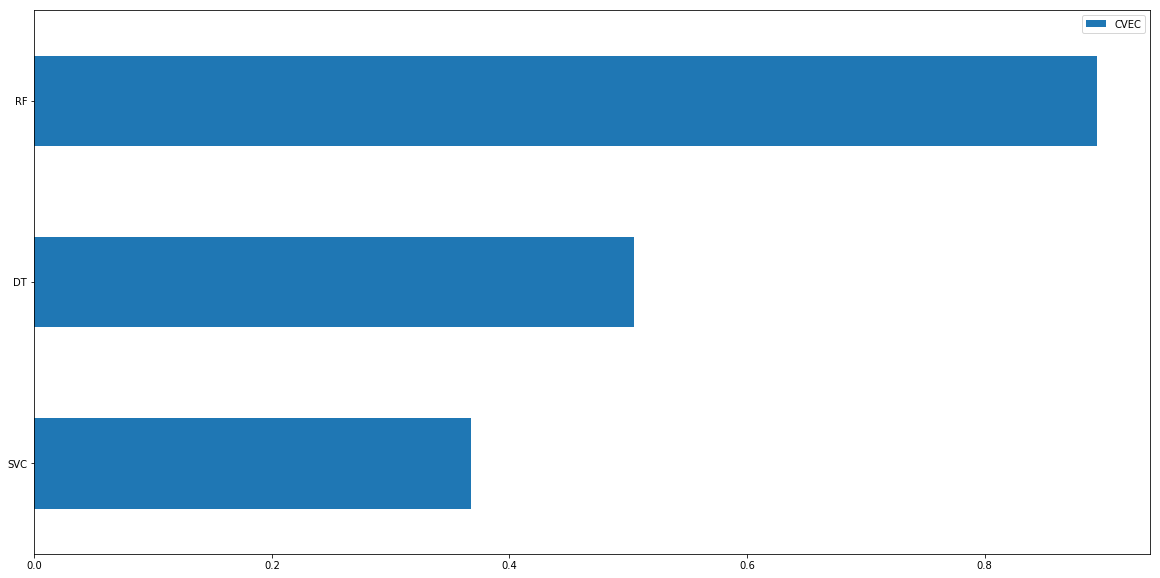

In [61]:
CVEC = [DT_CVEC,SVC_CVEC,RF_CVEC]
index = ["DT","SVC","RF"]

df = pd.DataFrame({'CVEC': CVEC}, index=index)
df.sort_values(by=['CVEC']).plot(kind='barh',stacked=False,figsize=(20,10),rot=0)

In [73]:
print("Akurasi data News Title dengan Klasifikasi Random Forest dan Count Vectorizer menghasilkan akurasi sebesar",RF_CVEC*100,"%")
print("Akurasi data News Title dengan Klasifikasi Decision Tree dan Count Vectorizer menghasilkan akurasi sebesar",DT_CVEC*100,"%")
print("Akurasi data News Title dengan Klasifikasi Support Vector dan Count Vectorizer menghasilkan akurasi sebesar",SVC_CVEC*100,"%")

Akurasi data News Title dengan Klasifikasi Random Forest dan Count Vectorizer menghasilkan akurasi sebesar 89.45601586938278 %
Akurasi data News Title dengan Klasifikasi Decision Tree dan Count Vectorizer menghasilkan akurasi sebesar 50.44632639047837 %
Akurasi data News Title dengan Klasifikasi Support Vector dan Count Vectorizer menghasilkan akurasi sebesar 36.76661326009003 %
